In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from sklearn import preprocessing

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum().sum()

0

In [6]:
df.shape

(918, 12)

# EDA

## Correlation

In [7]:
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

<AxesSubplot:>

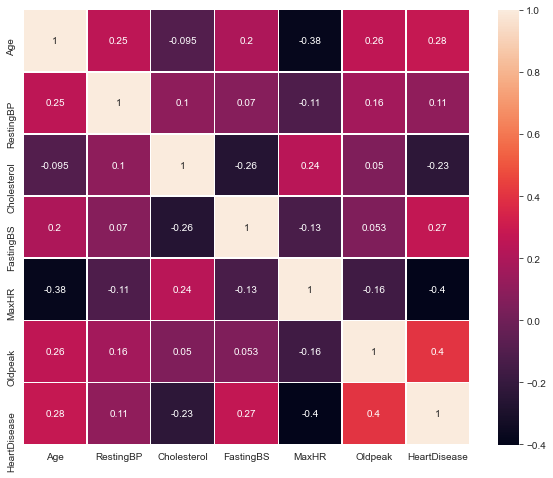

In [8]:
#Detecting correlations
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

## Splitting Data, Numerical and Catagorical Data

In [9]:
num_cols = df.select_dtypes(["int64","float64"])
obj_cols = df.select_dtypes("object")
print(num_cols.columns)
print(obj_cols.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')
Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


## Countplot for Numerical Features

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

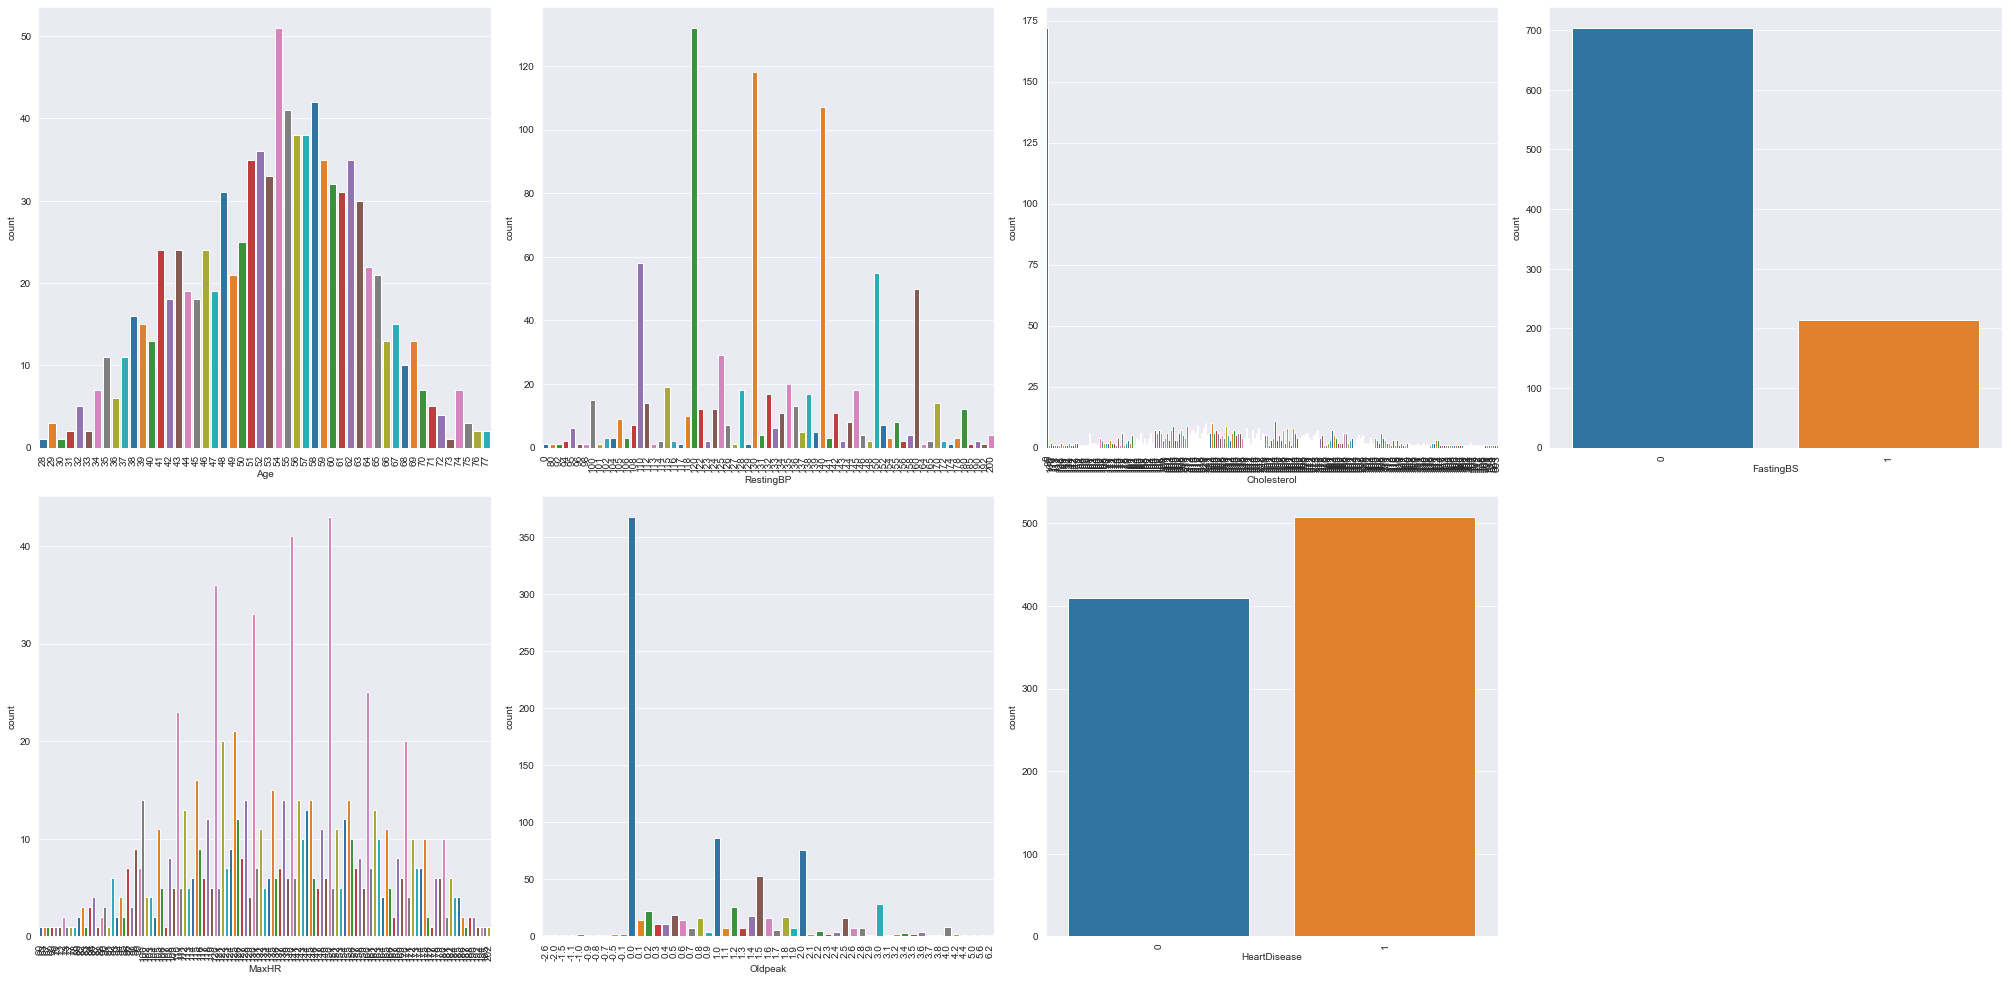

In [10]:
plt.figure(figsize=(28,20))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)

        ax = sns.countplot(df[column], palette = 'tab10')

        ax.tick_params(axis='x', rotation=90)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Countplot for Categorical Features

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

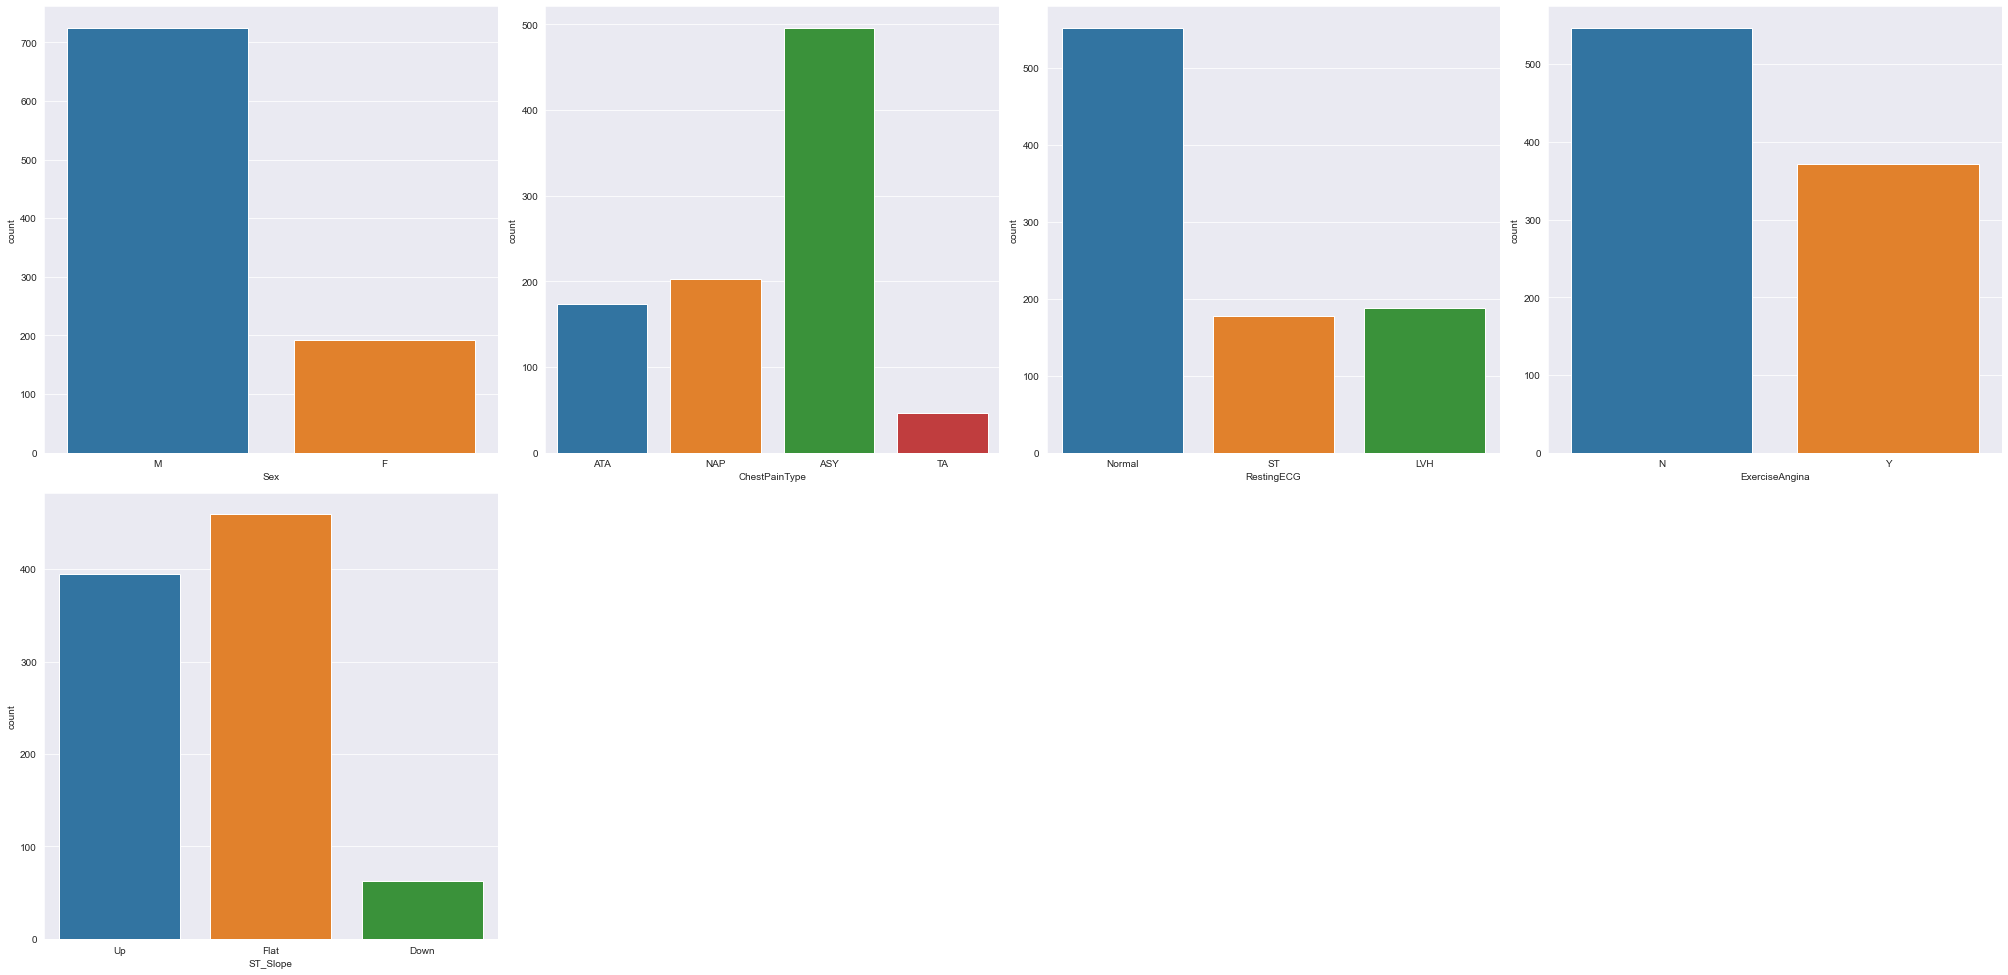

In [11]:
plt.figure(figsize=(28,20))
plotnumber = 1

for column in obj_cols:
    if plotnumber <= 6:
        ax = plt.subplot(3, 4, plotnumber)

        ax = sns.countplot(df[column], palette = 'tab10')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Catagorical Features and HeartDisease

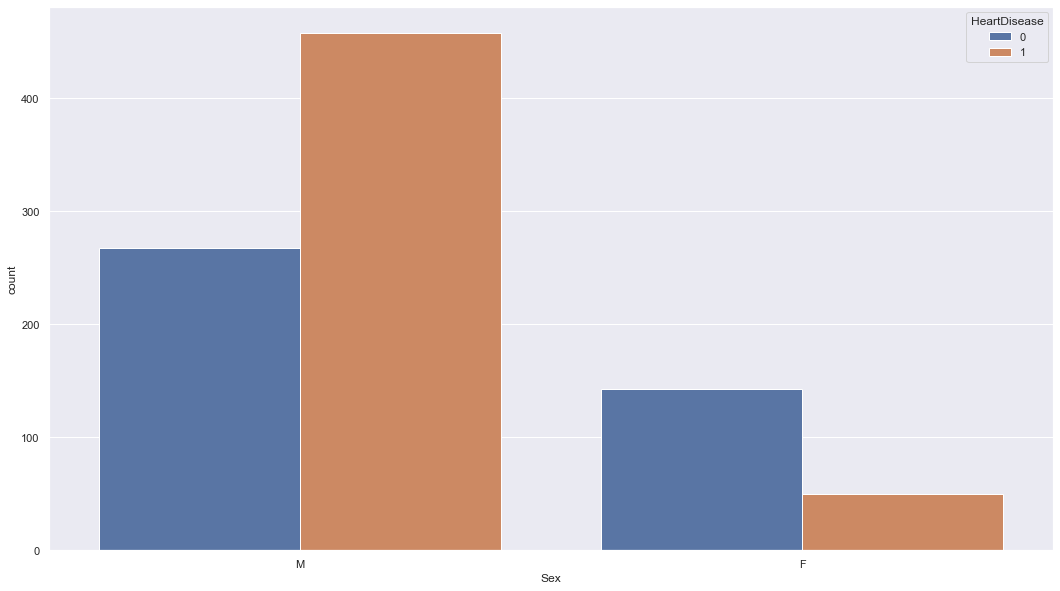

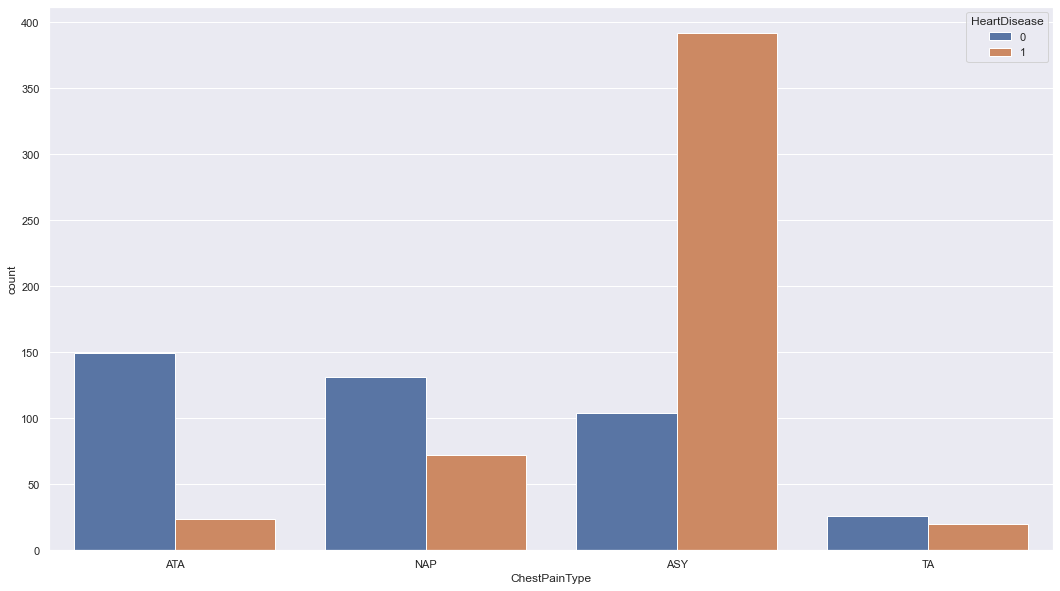

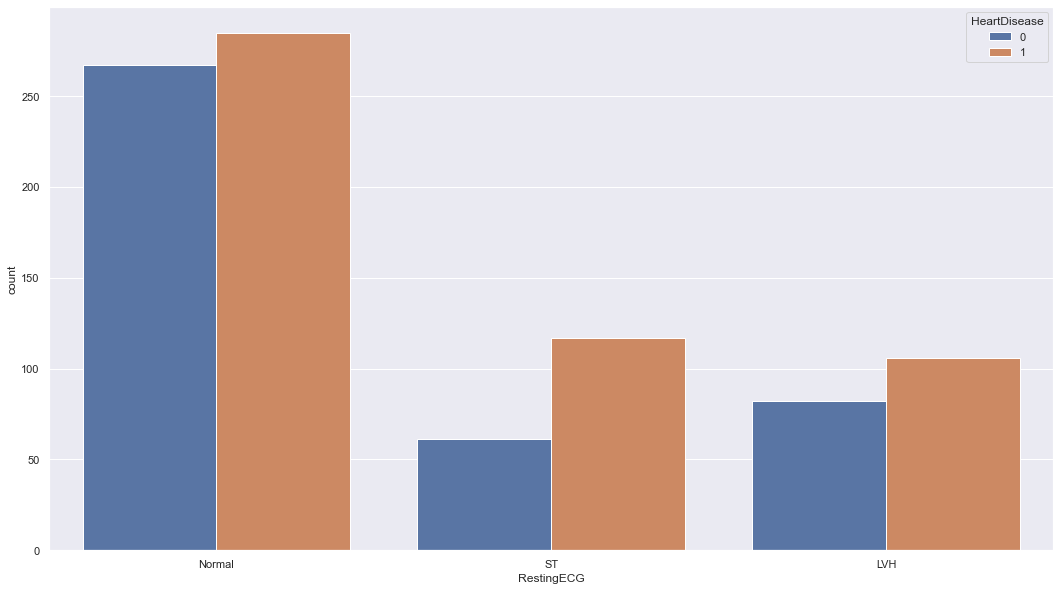

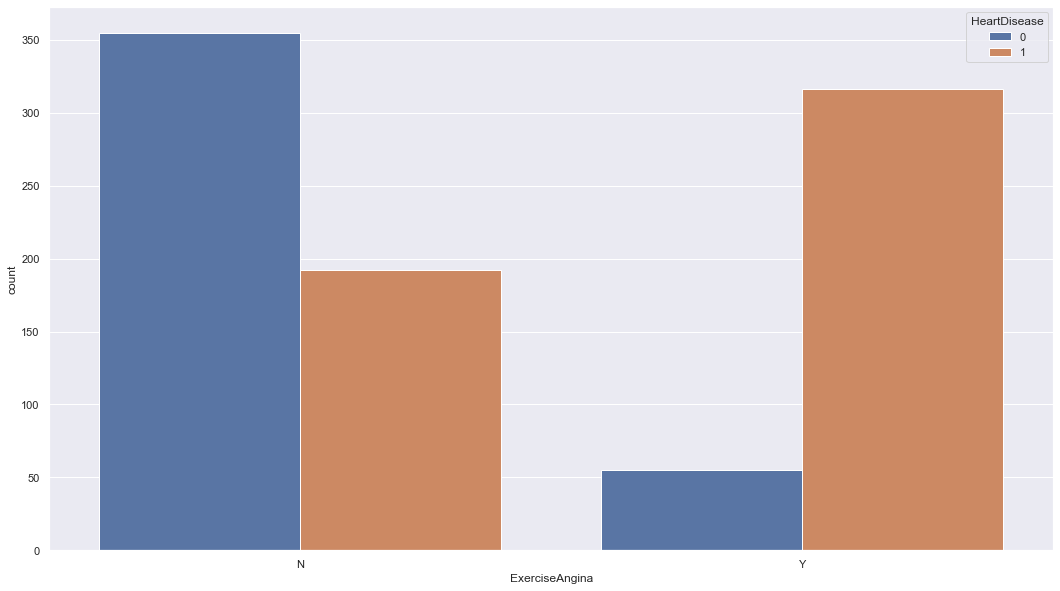

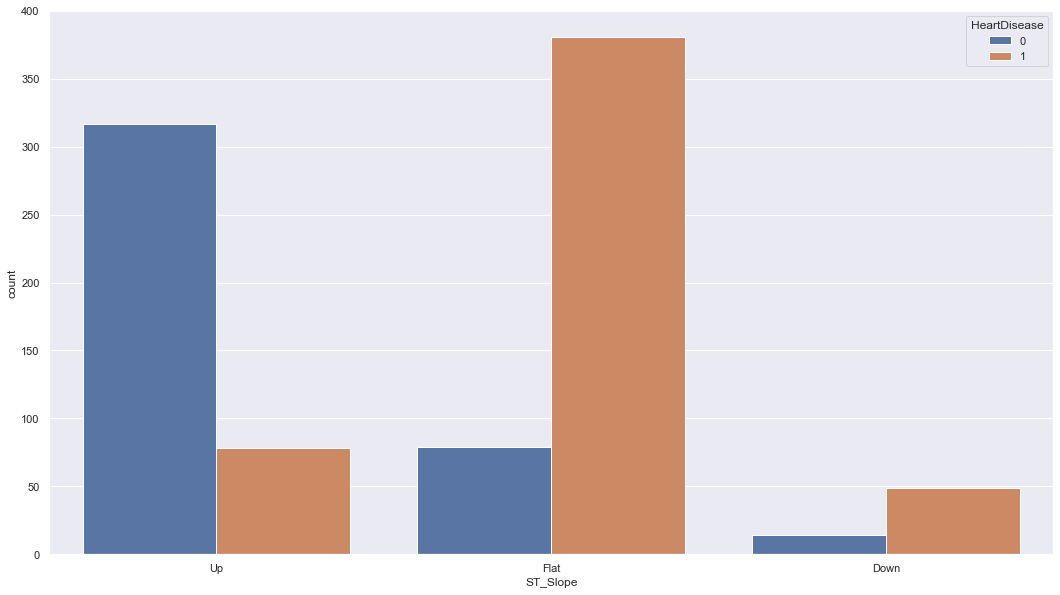

In [12]:
sns.set(rc = {'figure.figsize':(18,10)})
for i in obj_cols:
    sns.countplot(data=df, x=i, hue='HeartDisease')
    plt.show()

In [13]:
for i in obj_cols:
    print(df.groupby(i)['HeartDisease'].value_counts().sort_values(ascending=False))

Sex  HeartDisease
M    1               458
     0               267
F    0               143
     1                50
Name: HeartDisease, dtype: int64
ChestPainType  HeartDisease
ASY            1               392
ATA            0               149
NAP            0               131
ASY            0               104
NAP            1                72
TA             0                26
ATA            1                24
TA             1                20
Name: HeartDisease, dtype: int64
RestingECG  HeartDisease
Normal      1               285
            0               267
ST          1               117
LVH         1               106
            0                82
ST          0                61
Name: HeartDisease, dtype: int64
ExerciseAngina  HeartDisease
N               0               355
Y               1               316
N               1               192
Y               0                55
Name: HeartDisease, dtype: int64
ST_Slope  HeartDisease
Flat      1               381

## Relationship between numerical features and the target

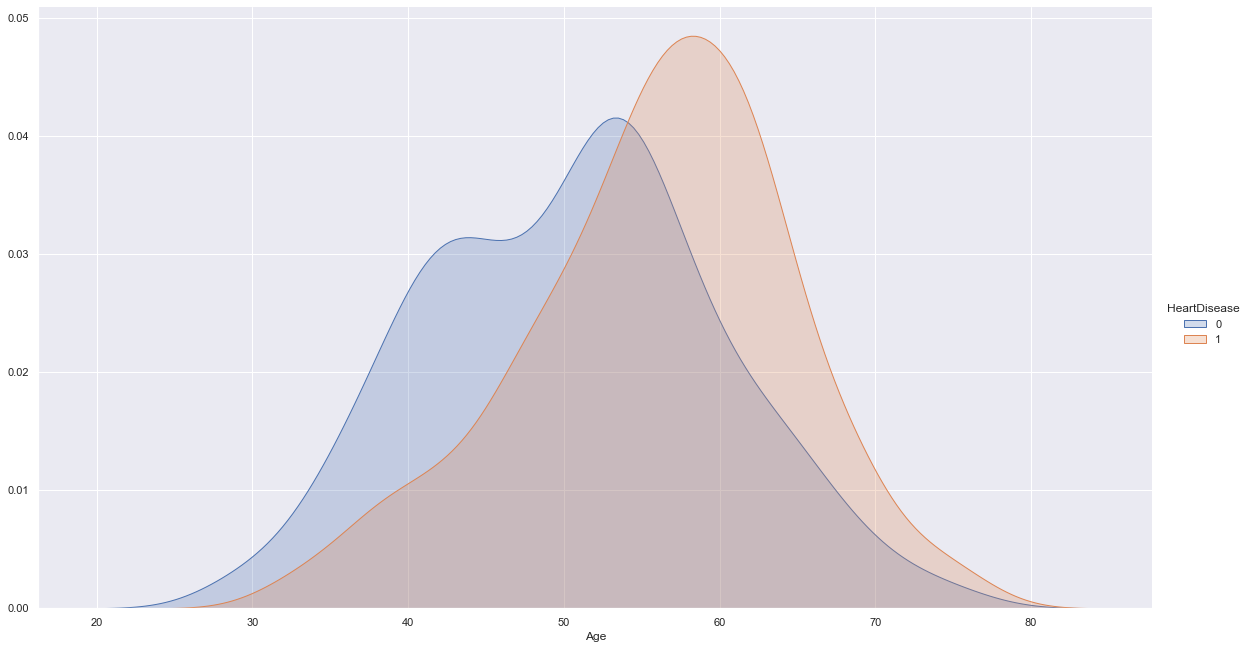

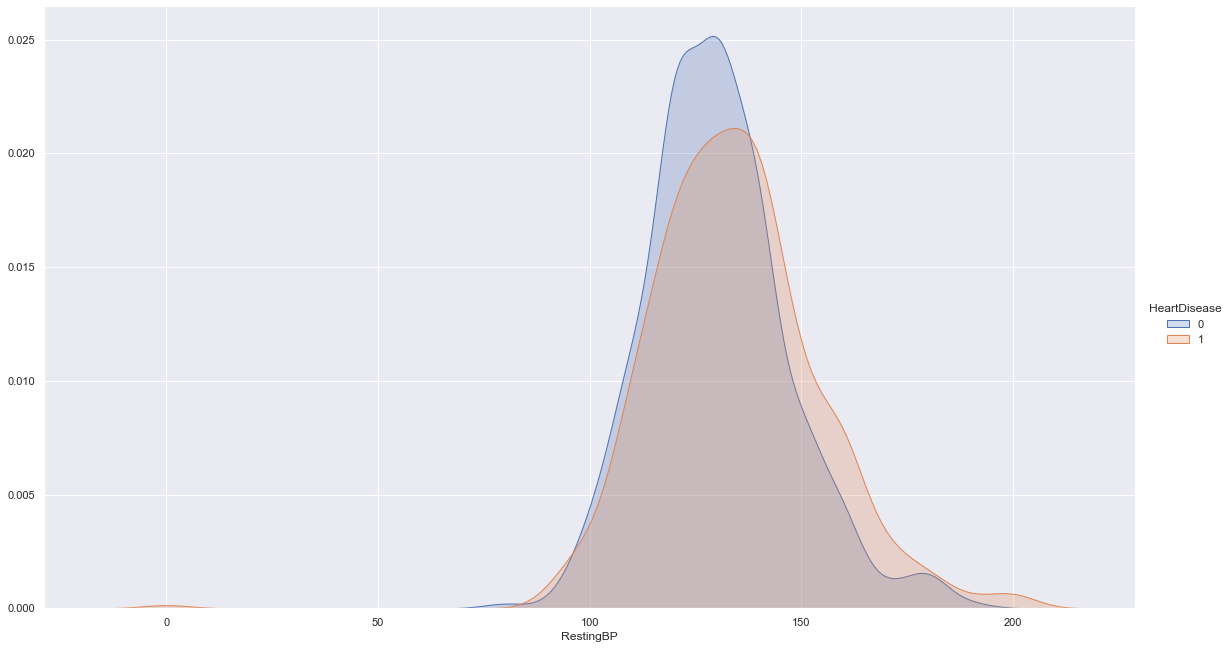

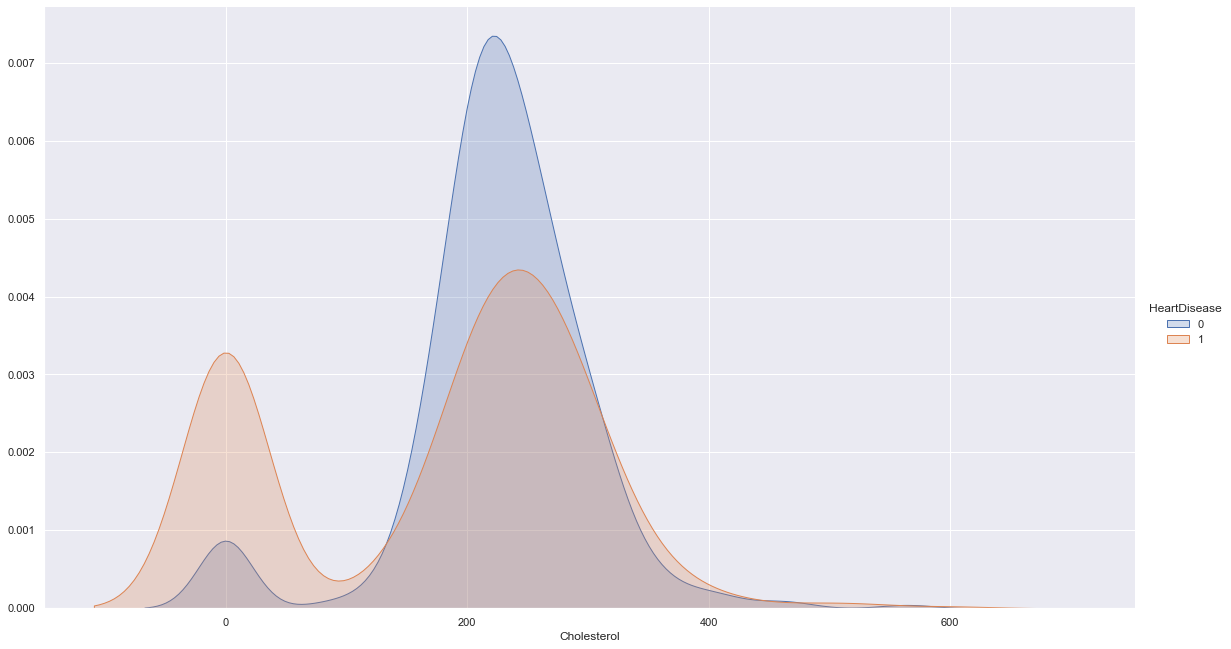

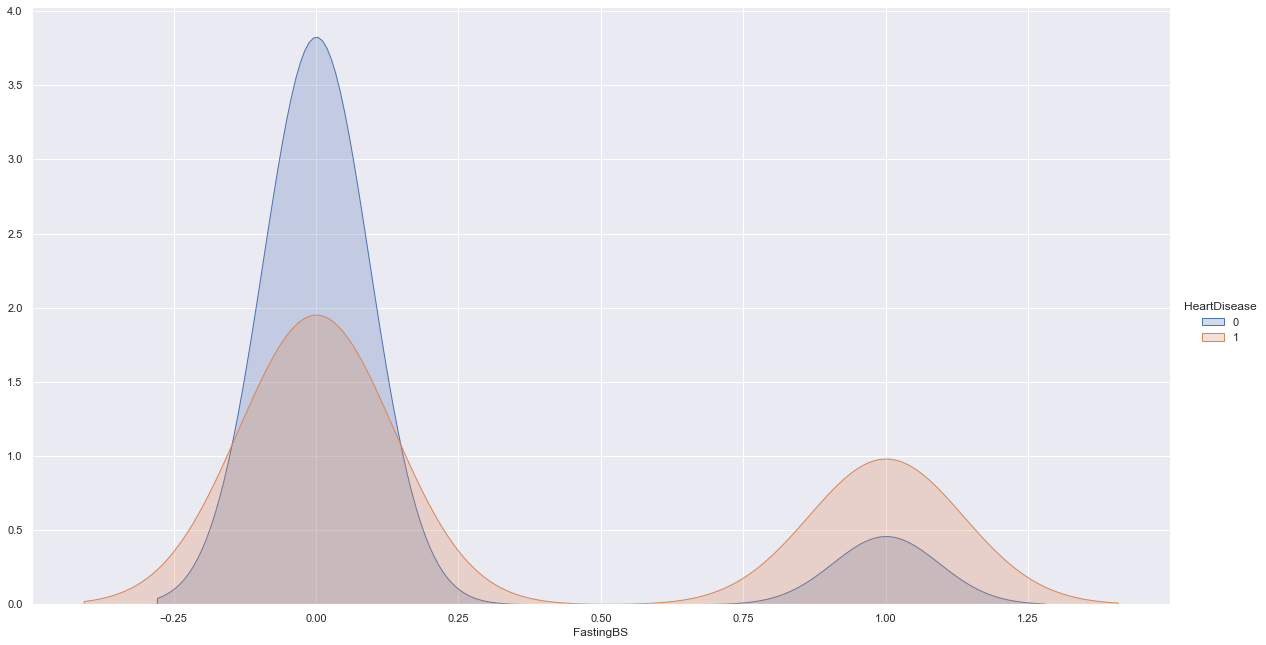

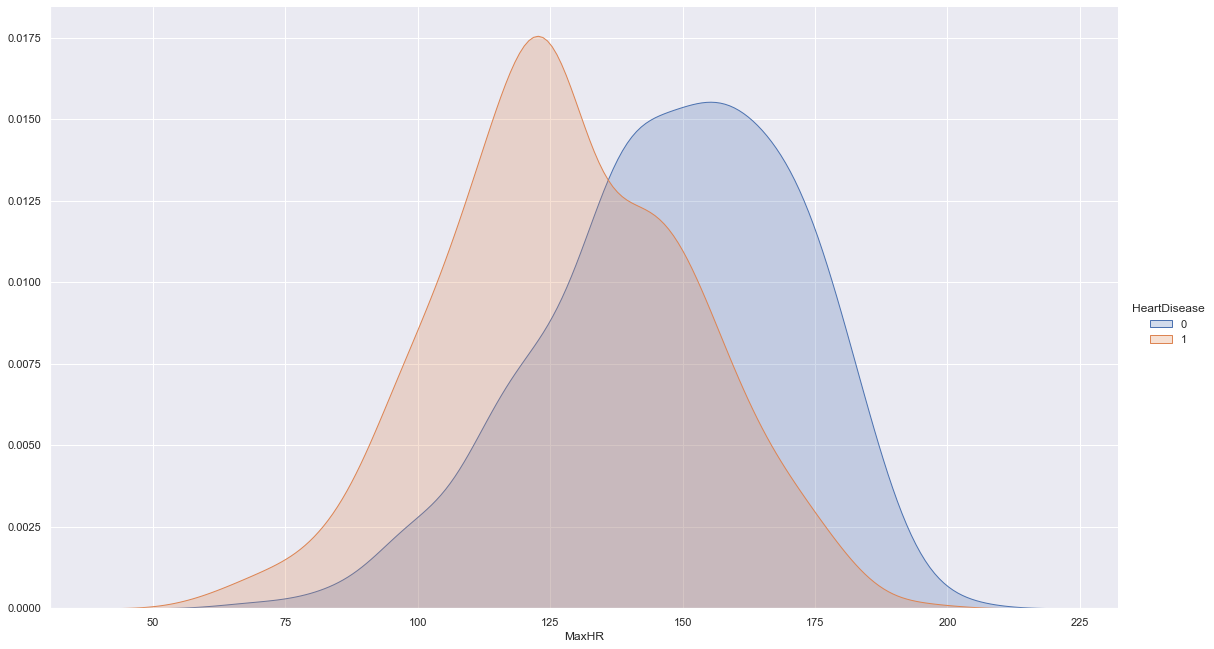

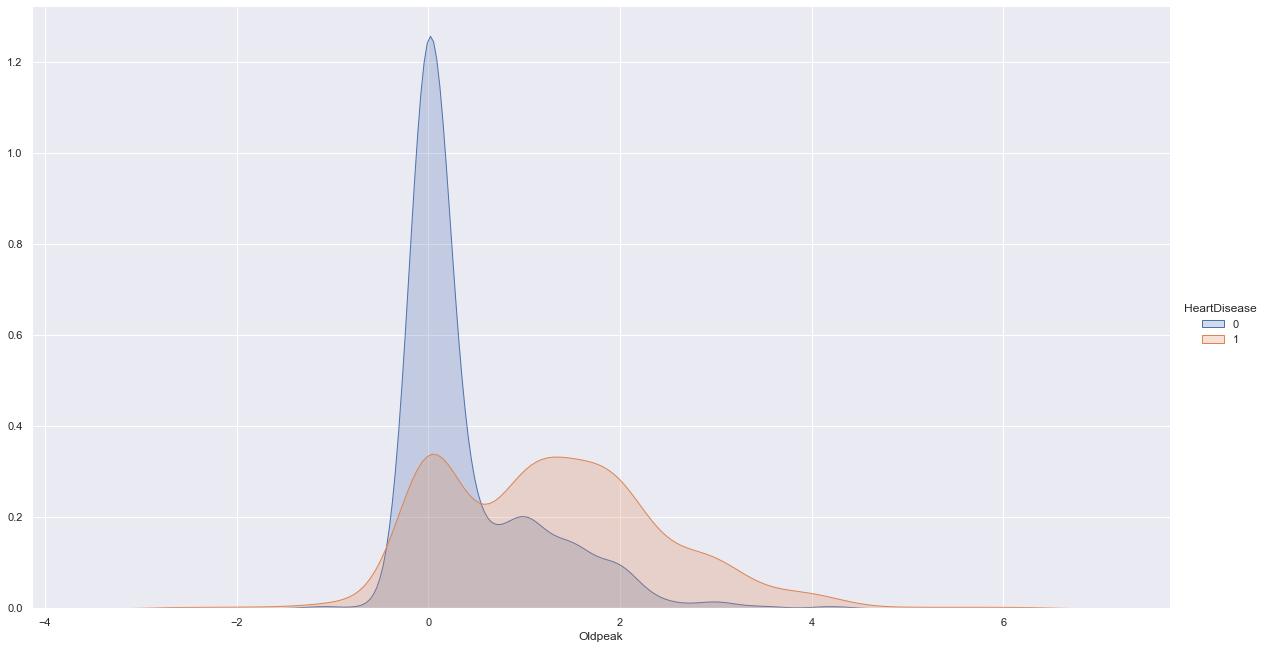

In [14]:
for i in num_cols.drop("HeartDisease",axis=1):
    graph = sns.FacetGrid(df, hue="HeartDisease", height=5)
    graph.map(sns.kdeplot,i,shade=True)
    graph.fig.set_size_inches(18,10)
    graph.add_legend()

## Most Frequent variables in every column

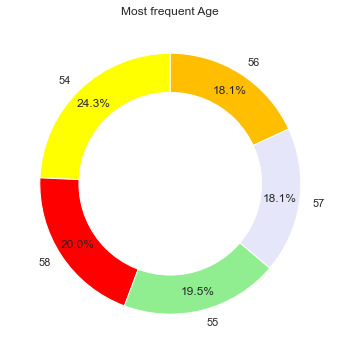

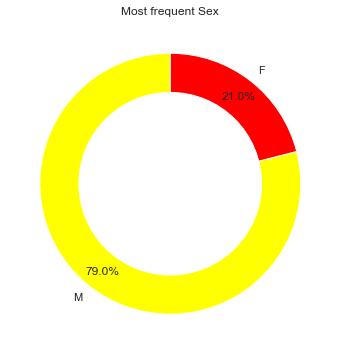

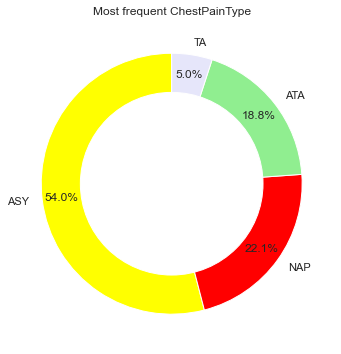

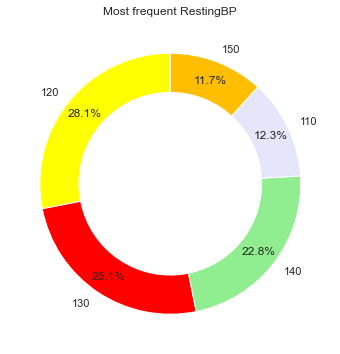

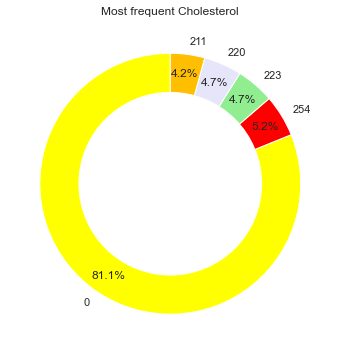

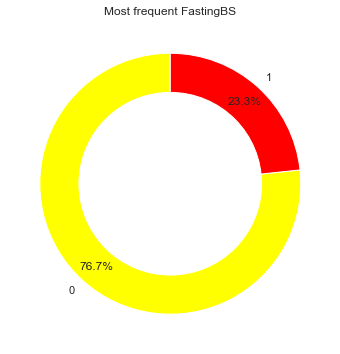

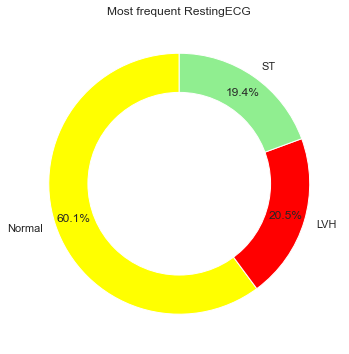

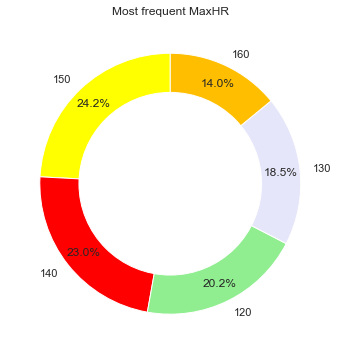

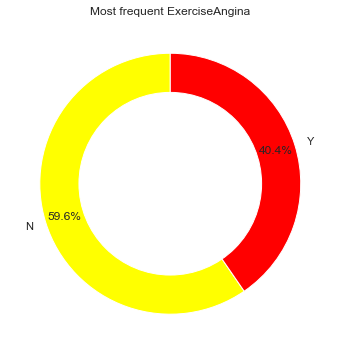

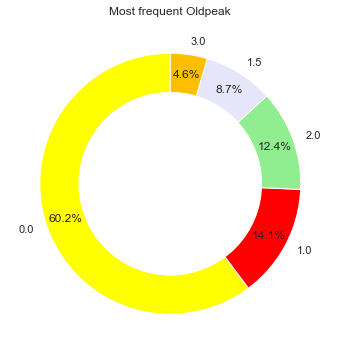

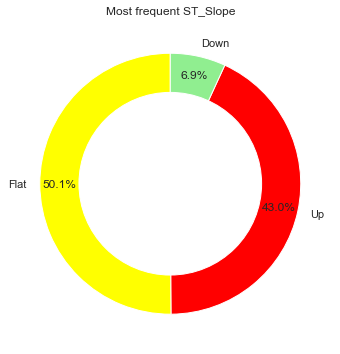

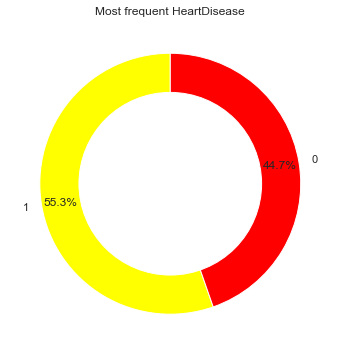

In [15]:
colors = ['#FFFF00','#FF0000','#90EE90','#E6E6FA','#FFBF00','#A020F0']

for i in df:
    ages = df[i].value_counts().index
    values = df[i].value_counts().values
    plt.pie(values[:5],labels=ages[:5],colors = colors,autopct='%1.1f%%', startangle=90, pctdistance=0.85)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.set_size_inches(8,6)
    plt.title(f"Most frequent {i}")
    plt.show()

## Data Preprocessing

In [16]:
for i in df.drop(["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"],axis=1):
    print(f'{i} has unique values of => {df[i].nunique()} ==> [{df[i].unique()}]')

Sex has unique values of => 2 ==> [['M' 'F']]
ChestPainType has unique values of => 4 ==> [['ATA' 'NAP' 'ASY' 'TA']]
FastingBS has unique values of => 2 ==> [[0 1]]
RestingECG has unique values of => 3 ==> [['Normal' 'ST' 'LVH']]
ExerciseAngina has unique values of => 2 ==> [['N' 'Y']]
ST_Slope has unique values of => 3 ==> [['Up' 'Flat' 'Down']]
HeartDisease has unique values of => 2 ==> [[0 1]]


## Label Encoding for Categorical Features

In [17]:
label_encoder = preprocessing.LabelEncoder()

In [18]:
for i in df.drop(["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"],axis=1):
    if df[i].nunique() == 2 :
        df[i] = label_encoder.fit_transform(df[i])
        print(label_encoder.inverse_transform([1,0]))

['M' 'F']
[1 0]
['Y' 'N']
[1 0]


In [19]:
#ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
df["ChestPainType"] = label_encoder.fit_transform(df["ChestPainType"])
label_encoder.inverse_transform([0,1,2,3])

array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)

In [20]:
df["ST_Slope"]  = label_encoder.fit_transform(df["ST_Slope"])
label_encoder.inverse_transform([1,0,2])

array(['Flat', 'Down', 'Up'], dtype=object)

## OneHotEncoding for "RestingECG" because it has 3 columns that are not ordered

In [21]:
df = pd.get_dummies(df, columns=['RestingECG'])

## Check the correlation heatmap again

<AxesSubplot:>

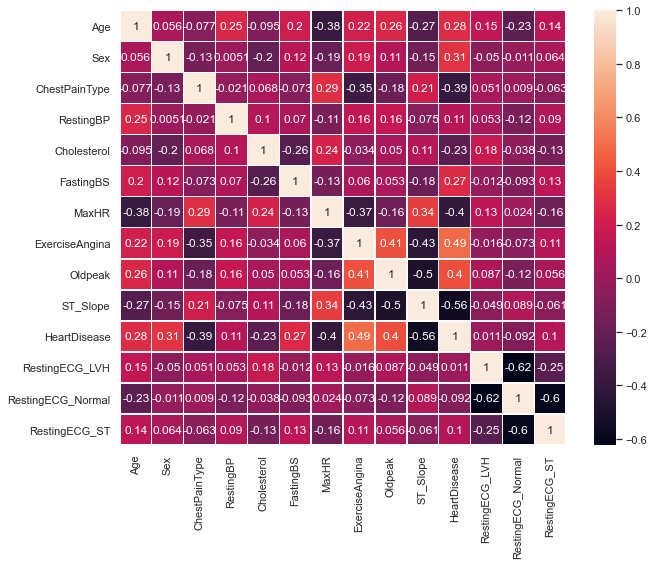

In [22]:
#Detecting correlations
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

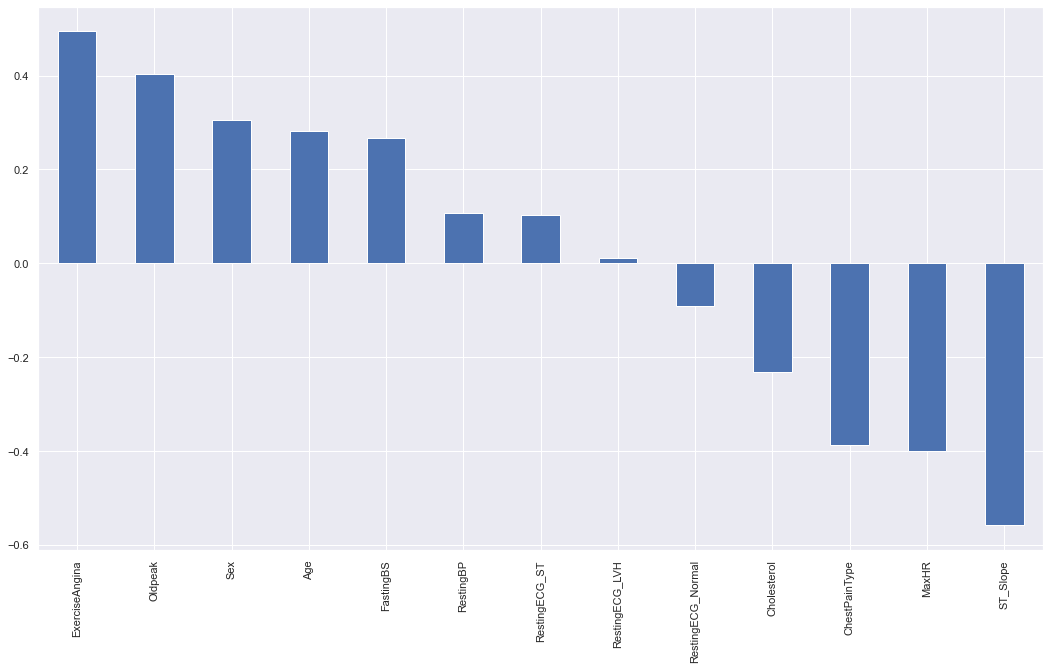

In [23]:
#Detecting the most correlated variables with the HeartDisease
df.corr()['HeartDisease'].sort_values(ascending=False).drop('HeartDisease').plot(kind='bar')

## Detect Outliers

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



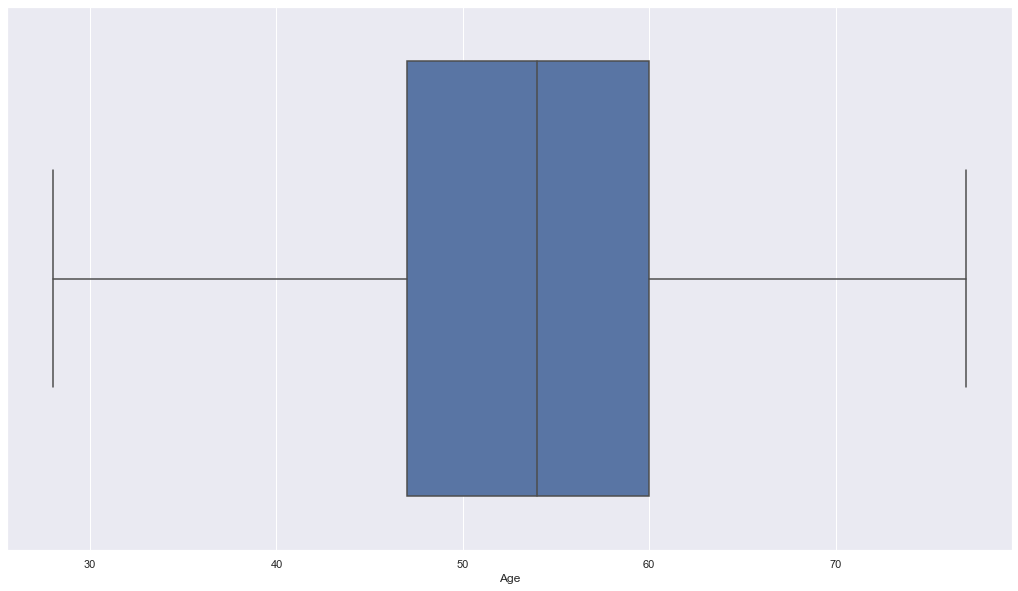

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



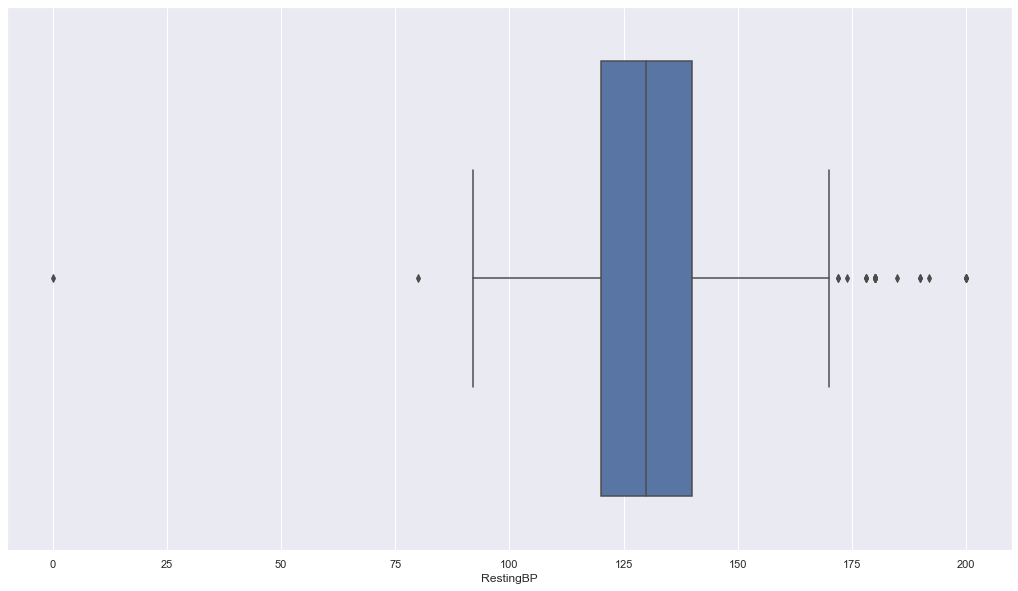

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



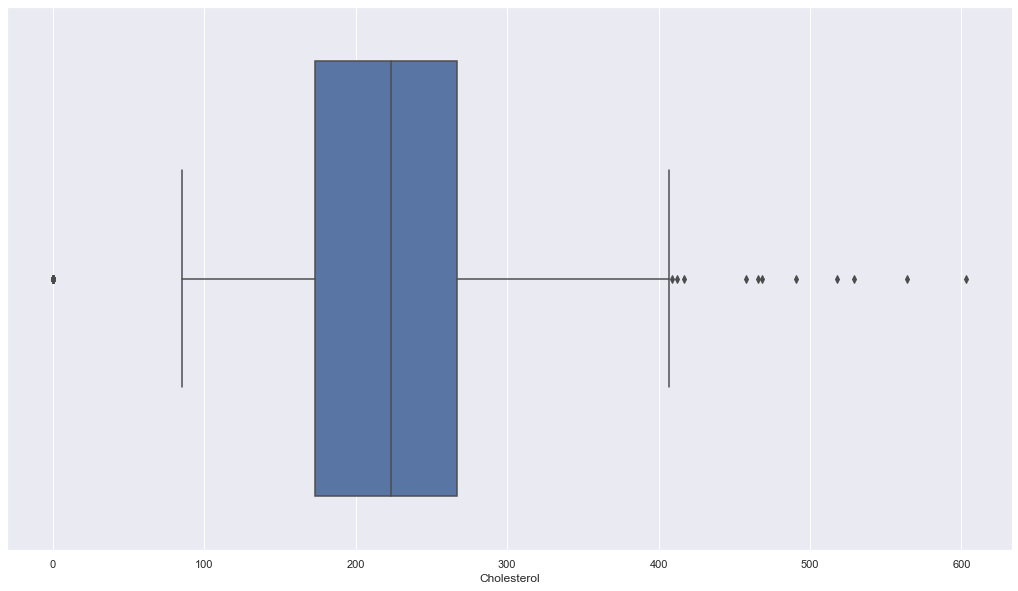

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



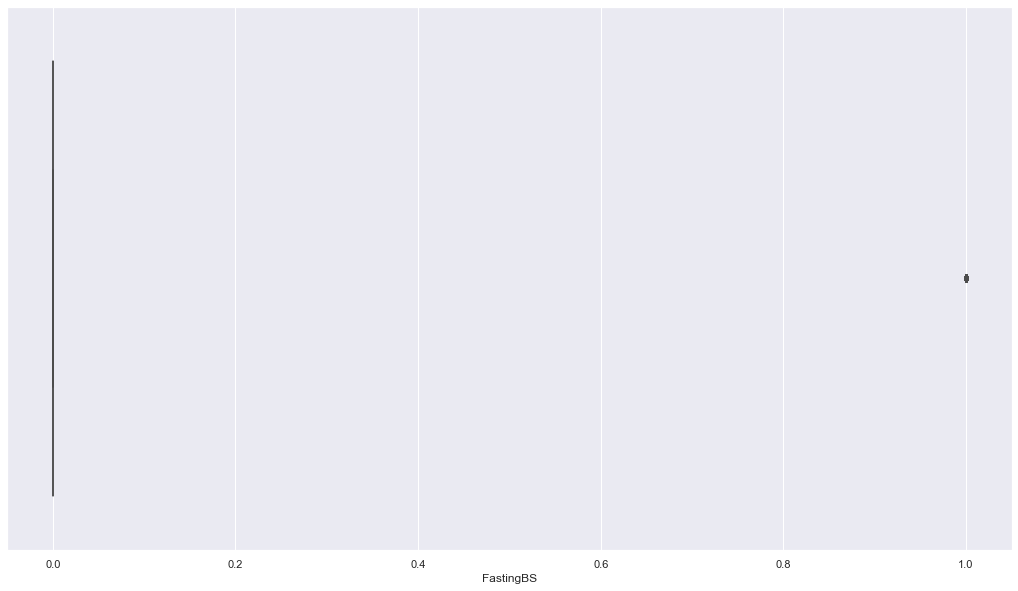

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



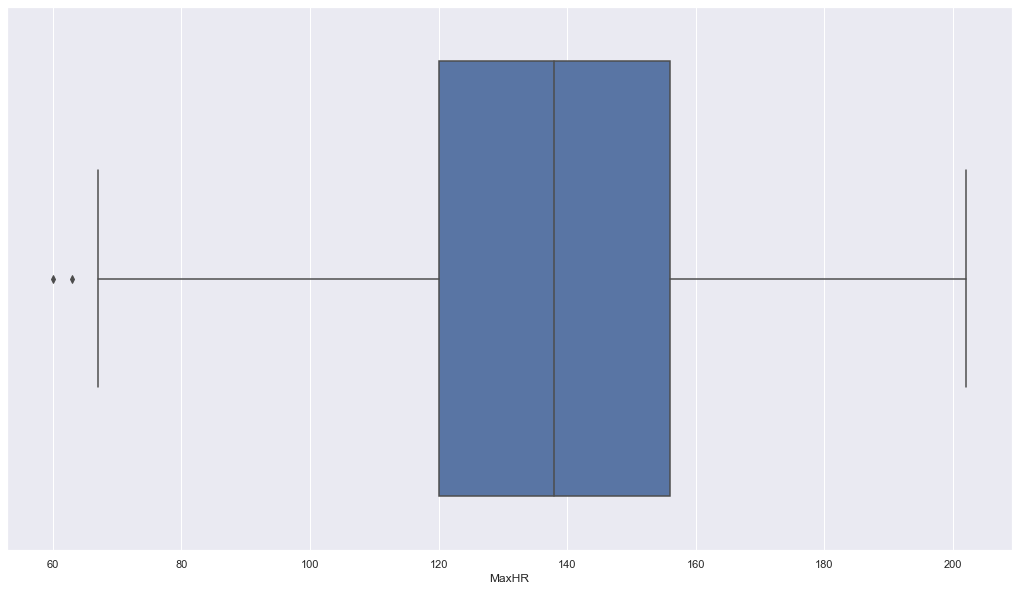

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



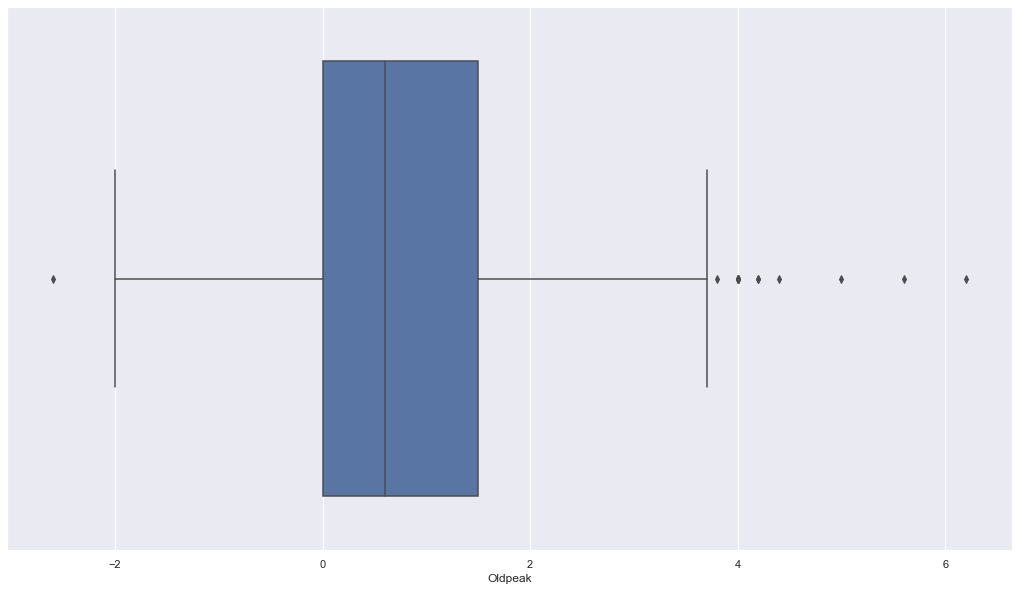

In [24]:
for i in num_cols.drop("HeartDisease",axis=1):
    sns.boxplot(df[i])
    plt.show()

## Outliers Imputation

In [25]:
#capping the high outliers (> 95% of the data) or the low outliers ( %5< of the data) with the 95% and 5% values
for col in num_cols.drop("HeartDisease",axis=1):
    low, high = df[col].quantile([0.05, 0.95])
    for i in df[col].index:
        if (df[col][i]>high):
            df.loc[i, col] = high
        elif (df[col][i]<low):
            df.loc[i, col] = low



C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



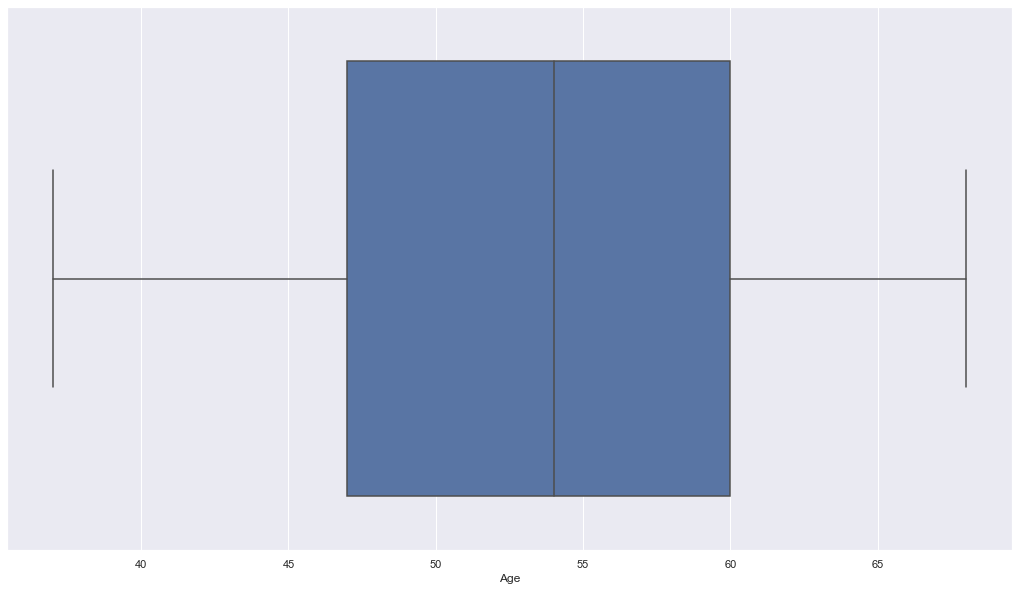

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



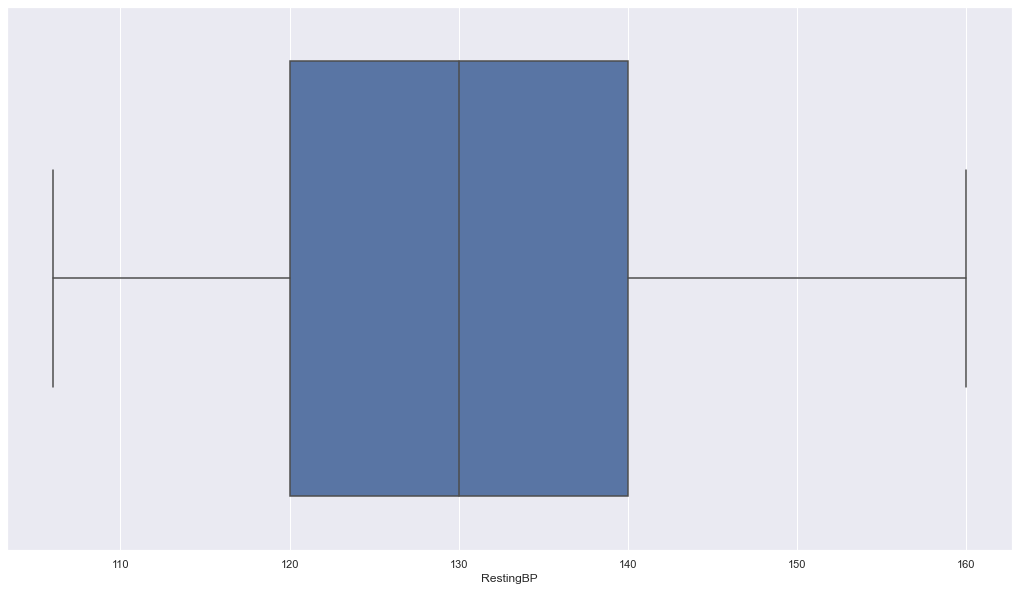

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



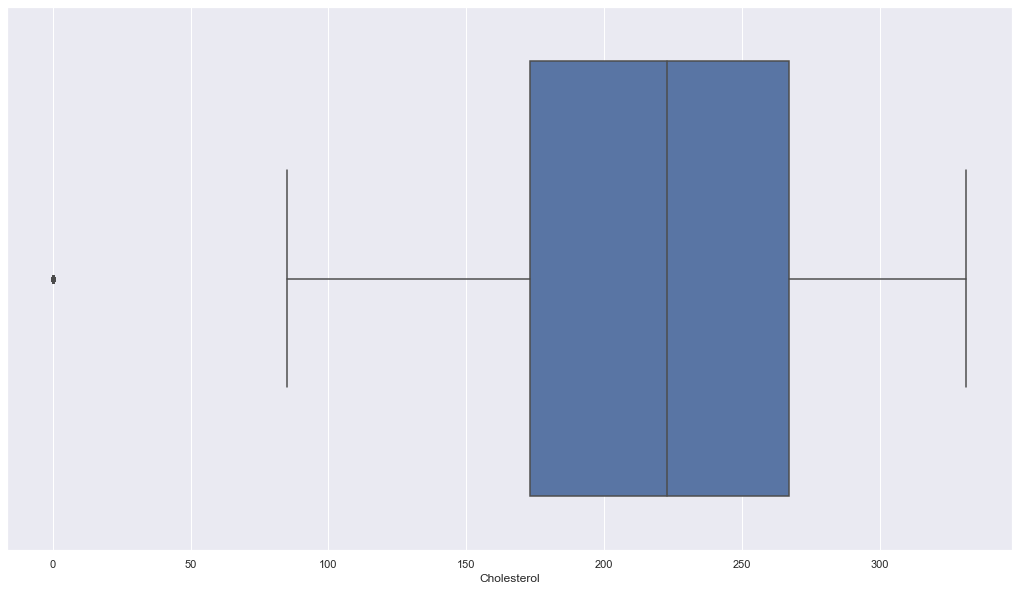

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



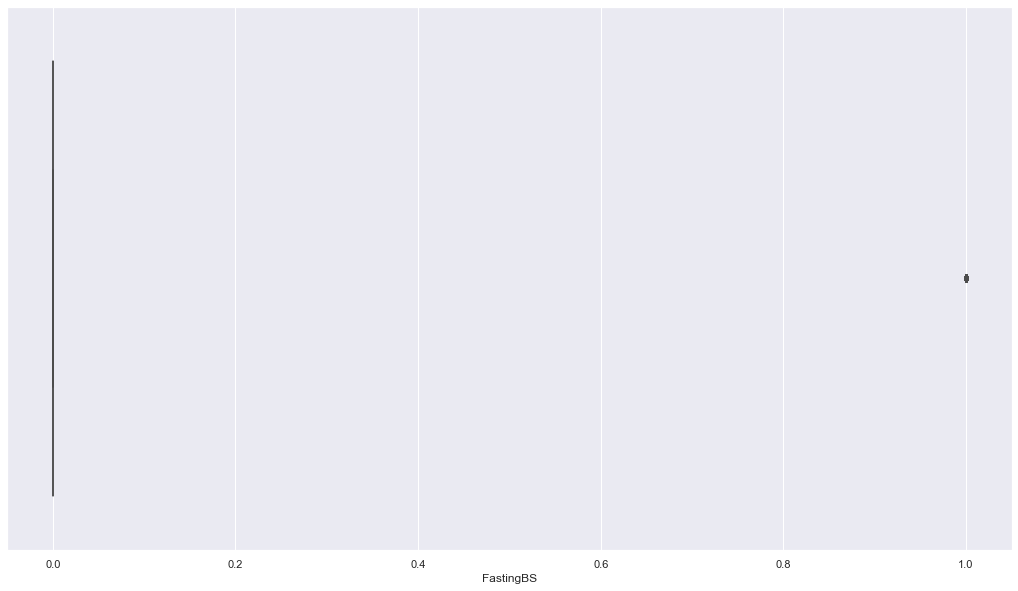

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



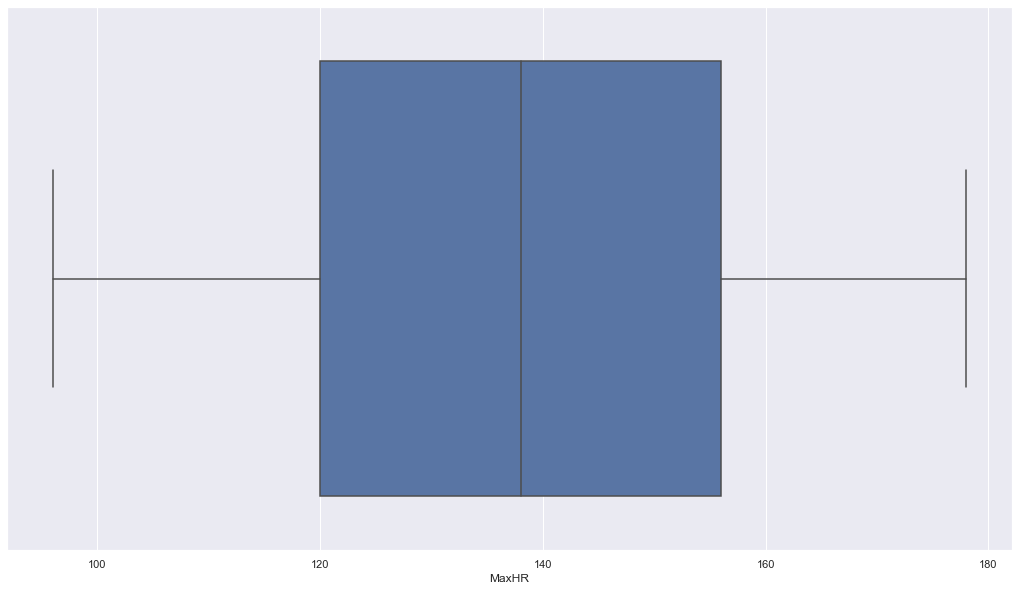

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



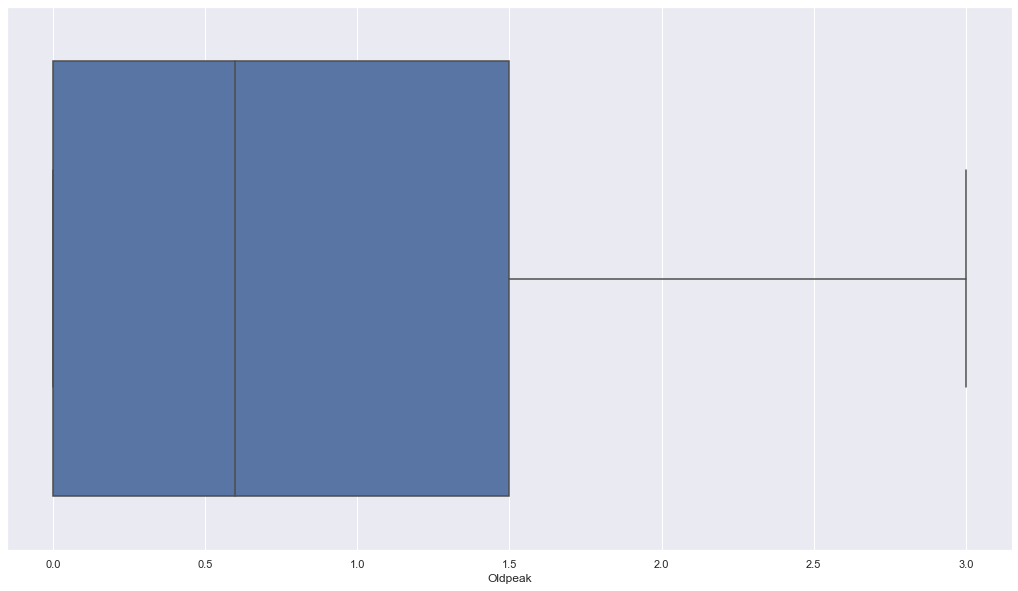

In [26]:
for i in num_cols.drop("HeartDisease",axis=1):
    sns.boxplot(df[i])
    plt.show()

## Check Skeweness

 Age skewness is -0.22748250227023234


C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



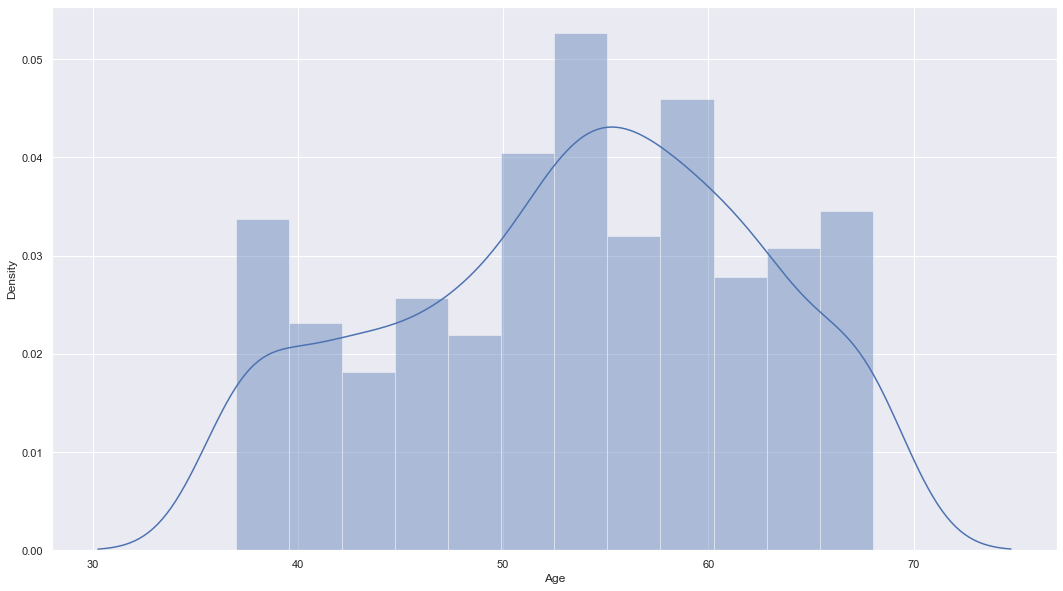

 RestingBP skewness is 0.21896396088877224


C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



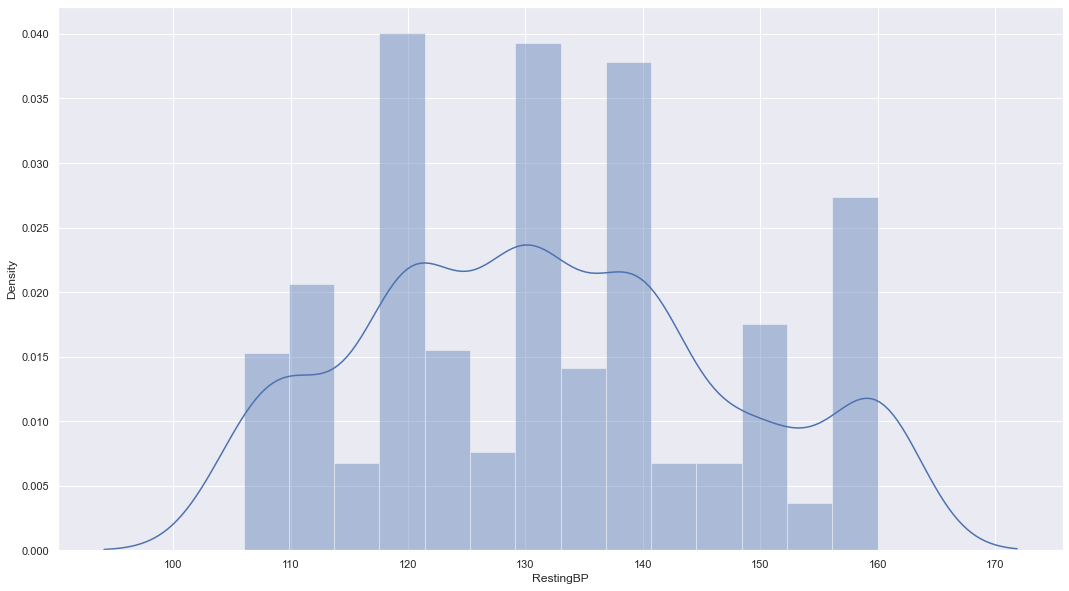

 Cholesterol skewness is -0.9521806792097705


C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



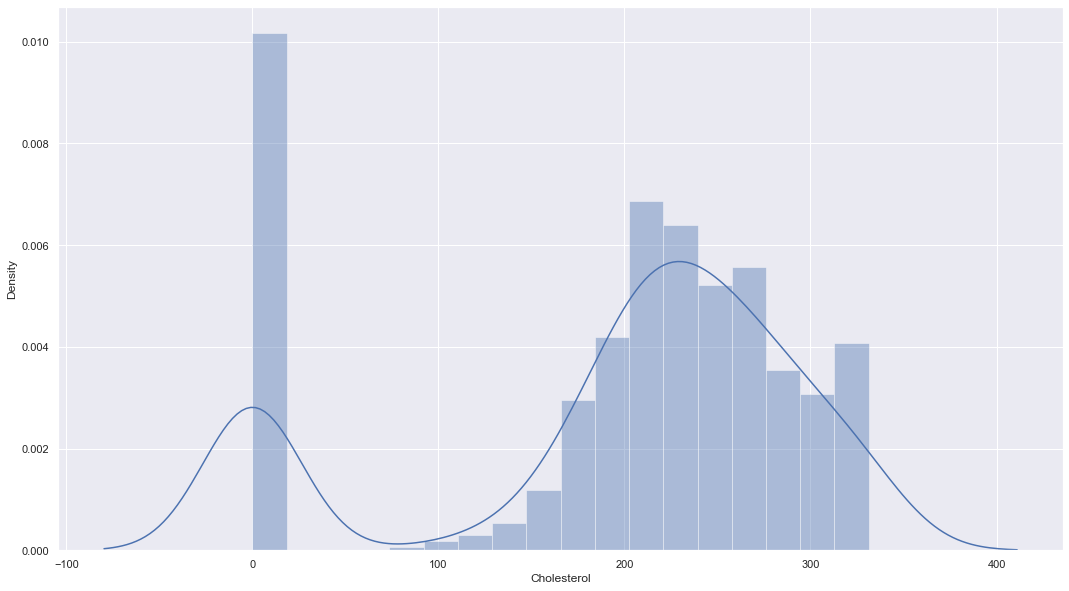

 FastingBS skewness is 1.2644841750727027


C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



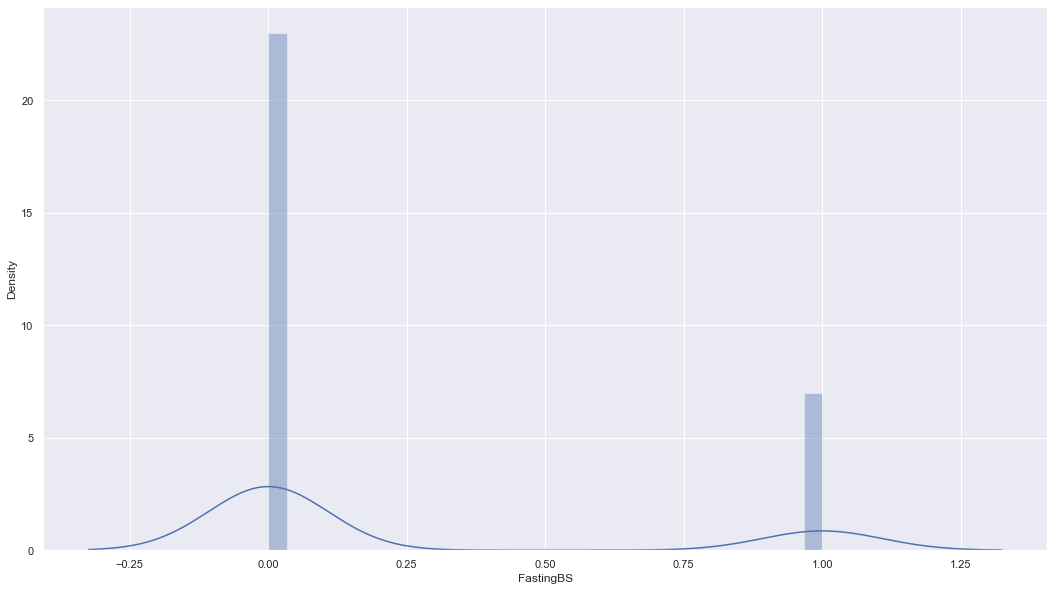

 MaxHR skewness is -0.008918888358171737


C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



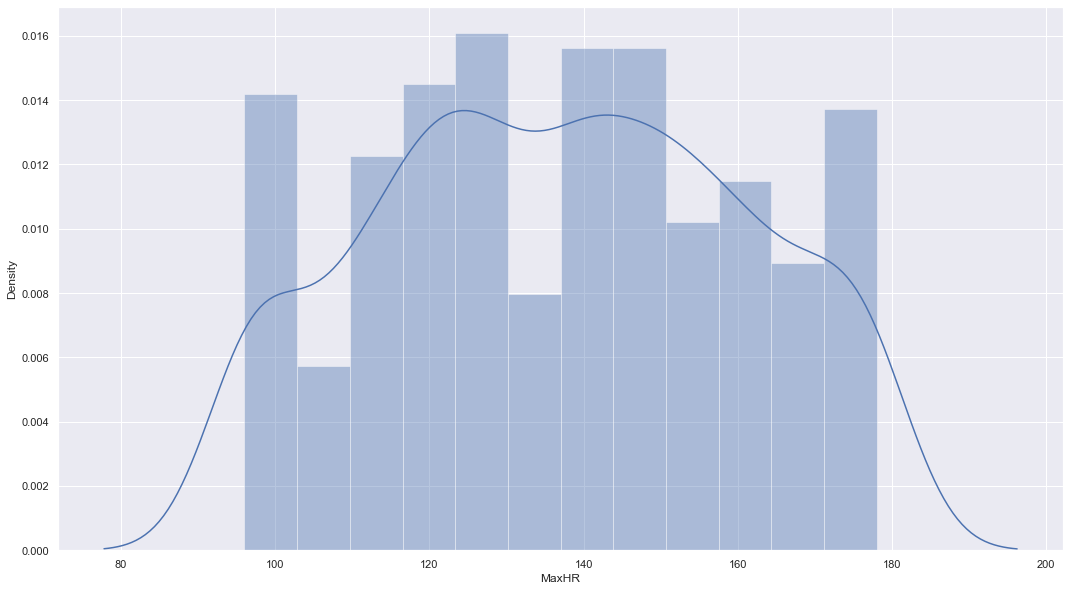

 Oldpeak skewness is 0.7595629567027858


C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



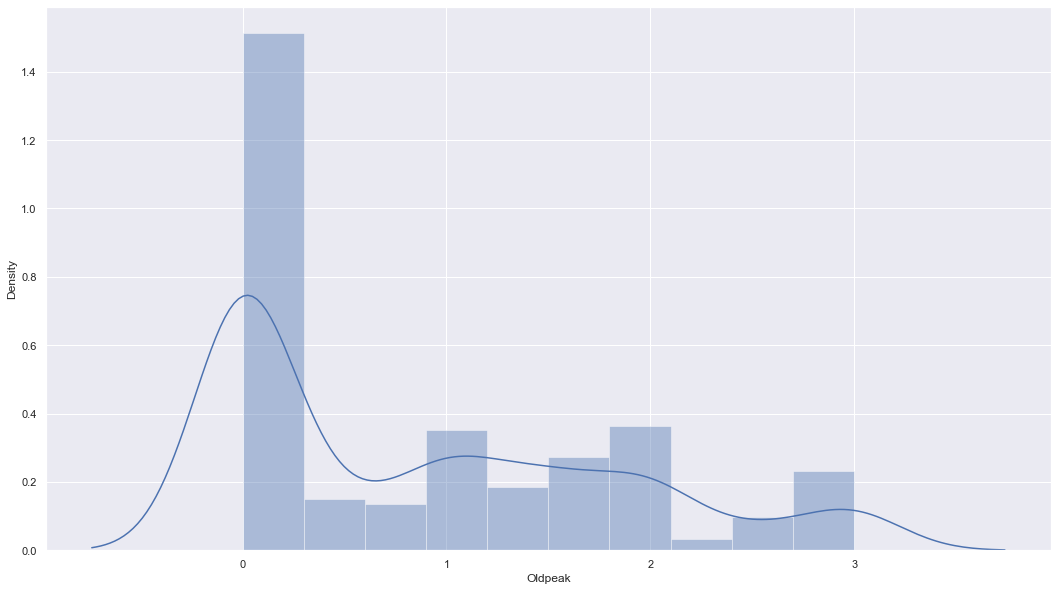

In [28]:
#Performing the log to normalize the data
for feature in num_cols.drop("HeartDisease",axis=1):

    print(f" {feature} skewness is {df[feature].skew()}")
    sns.distplot(df[feature])
    plt.show()

## Modeling

In [29]:
#Necessary libraries for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [30]:
#Splitting the independent features from the dependant feature
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

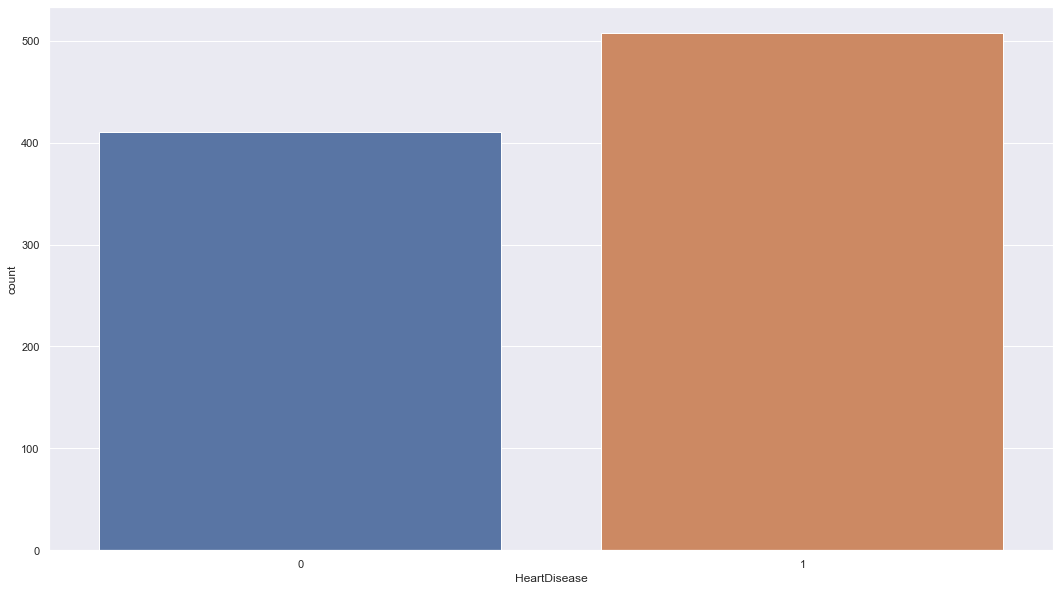

In [36]:
sns.countplot(y)

## Splitting Data into train and test set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [32]:
#Feature scaling
standard_scaler = StandardScaler()
X_train= standard_scaler.fit_transform(X_train)
X_test= standard_scaler.transform(X_test)

## Random Forest Modeling
I chose Random Forest Modeling because my target isnt balance

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rc = RandomForestClassifier()
rc.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of decision tree
scores = cross_val_score(rc, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
rc_acc = accuracy_score(y_test, rc.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rc.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rc.predict(X_test))}")

Cross-validation scores:[0.92753623 0.8115942  0.94202899 0.88405797 0.8115942  0.85507246
 0.84057971 0.86956522 0.85294118 0.82352941]
Average cross-validation score: 0.861849957374254
Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.8826086956521739 

Confusion Matrix :- 
[[ 87  11]
 [ 16 116]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87        98
           1       0.91      0.88      0.90       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



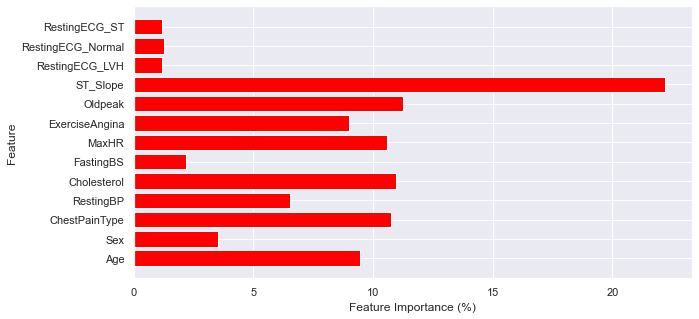

In [35]:
plt.figure(figsize=(10,5))
plt.barh(df.drop(['HeartDisease'],axis=1).columns.values,rc.feature_importances_*100,align='center', color='red')
plt.xlabel("Feature Importance (%)")
plt.ylabel("Feature")
plt.grid(True)
plt.show()